In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R
import ipyvolume as ipv
import pathlib, glob
from scipy.stats import norm
import time

In [3]:
import sys
sys.path.append('../src/')
from forward_modeling import project_volume, create_circular_mask, slice_volume, rotate_volume, take_slice, project_volume_bis, backprojection, add_slice
from scipy.interpolate import RegularGridInterpolator, griddata
from molecular_handling import particle
from molecular_handling import generate_dataset
from scipy.spatial.transform import Rotation as R
from forward_modeling import project_volume

In [4]:
data_directory = pathlib.Path('..') / 'data'  # directory where the data is
output_dir = data_directory / 'test'
if output_dir.exists():
    print(f'Data directory {output_dir} exists: ')
    for x in list(output_dir.glob('*')):
        print(f'>>> {str(x)}') 

Data directory ../data/test exists: 
>>> ../data/test/particle_hires_xyz.npy
>>> ../data/test/particle_oddres_meta.npy
>>> ../data/test/particle_hires_map.npy
>>> ../data/test/.DS_Store
>>> ../data/test/particle_meta.npy
>>> ../data/test/het_particle_meta.npy
>>> ../data/test/particle_hires_data.npy
>>> ../data/test/particle_hires_meta.npy
>>> ../data/test/particle_map.npy
>>> ../data/test/particle_oddres_data.npy
>>> ../data/test/particle_xyz.npy
>>> ../data/test/particle_oddres_map.npy
>>> ../data/test/het_particle_data.npy
>>> ../data/test/particle_oddres_xyz.npy
>>> ../data/test/het_particle_map.npy
>>> ../data/test/particle_data.npy


## Evolution of the Mean-Squared Error with the length of the dataset

In [5]:
keyword='particle_oddres'
dataset     = np.load(f'{output_dir}/{keyword}_data.npy')
metadataset = np.load(f'{output_dir}/{keyword}_meta.npy')
volume      = np.load(f'{output_dir}/{keyword}_map.npy')
structure   = np.load(f'{output_dir}/{keyword}_xyz.npy')

lengths = [10,30,50,80,100,150,200,300,500,700,1000,1200,1500,2000,3000]
solutions = []
scores = []
mse = []

for length in lengths:
    volume_fft = np.fft.fftshift(np.fft.fftn(np.fft.ifftshift(volume)))
    vol = (backprojection(dataset[:length], metadataset[:length,0:3]))
    vol_fft = np.fft.fftshift(np.fft.fftn(np.fft.ifftshift(vol)))
    print(f"With length = {length}:")
    print(f"sum of pixels for backprojection: {np.sum(np.real(vol))}")
    print(f"sum of pixels for real volume: {np.sum(np.real(volume))}")
    print(f"sum of pixels for backprojection in Fourier space: {np.sum(np.abs(vol_fft))}")
    print(f"sum of pixels for real volume in Fourier space: {np.sum(np.abs(volume_fft))}")
    print(f"mse in real space: {(np.mean(np.power(volume-vol, 2)))}")

    print(50*"-")
    scores.append(np.sum(np.real(vol)))
    mse.append((np.mean(np.power(volume-vol, 2))))
    solutions.append(np.sum(np.real(volume)))

With length = 10:
sum of pixels for backprojection: 792.7007809000501
sum of pixels for real volume: 792.6914147189551
sum of pixels for backprojection in Fourier space: 57998.74606368438
sum of pixels for real volume in Fourier space: 58448.31260864058
mse in real space: 0.00019853798856132106
--------------------------------------------------
With length = 30:
sum of pixels for backprojection: 792.7007682149156
sum of pixels for real volume: 792.6914147189551
sum of pixels for backprojection in Fourier space: 59454.033274694666
sum of pixels for real volume in Fourier space: 58448.31260864058
mse in real space: 7.863858687891931e-05
--------------------------------------------------
With length = 50:
sum of pixels for backprojection: 792.7007703070365
sum of pixels for real volume: 792.6914147189551
sum of pixels for backprojection in Fourier space: 59212.17858458978
sum of pixels for real volume in Fourier space: 58448.31260864058
mse in real space: 6.806331516787109e-05
-----------

In [6]:
keyword='particle'
dataset     = np.load(f'{output_dir}/{keyword}_data.npy')
metadataset = np.load(f'{output_dir}/{keyword}_meta.npy')
volume2      = np.load(f'{output_dir}/{keyword}_map.npy')
structure   = np.load(f'{output_dir}/{keyword}_xyz.npy')

lengths = [10,30,50,80,100,150,200,300,500,700,1000,1200,1500,2000,3000]
scores2 = []
mse2 = []
solutions2=[]

for length in lengths:
    volume_fft = np.fft.fftshift(np.fft.fftn(np.fft.ifftshift(volume2)))
    vol2 = (backprojection(dataset[:length], metadataset[:length,0:3]))
    vol_fft = np.fft.fftshift(np.fft.fftn(np.fft.ifftshift(vol2)))
    print(f"With length = {length}:")
    print(f"sum of pixels for backprojection: {np.sum(np.real(vol2))}")
    print(f"sum of pixels for real volume: {np.sum(np.real(volume2))}")
    print(f"sum of pixels for backprojection in Fourier space: {np.sum(np.abs(vol_fft))}")
    print(f"sum of pixels for real volume in Fourier space: {np.sum(np.abs(volume_fft))}")
    print(f"mse in real space: {(np.mean(np.power(volume2-vol2, 2)))}")

    print(50*"-")
    scores2.append(np.sum(np.real(vol2)))
    mse2.append(np.mean(np.power(volume2-vol2, 2)))
    solutions2.append(np.sum(np.real(volume2)))

With length = 10:
sum of pixels for backprojection: 589.9074671230818
sum of pixels for real volume: 720.6748632877983
sum of pixels for backprojection in Fourier space: 50264.00707917734
sum of pixels for real volume in Fourier space: 53294.07101520368
mse in real space: 0.0008442060844842914
--------------------------------------------------
With length = 30:
sum of pixels for backprojection: 551.8469179284094
sum of pixels for real volume: 720.6748632877983
sum of pixels for backprojection in Fourier space: 50132.86246406756
sum of pixels for real volume in Fourier space: 53294.07101520368
mse in real space: 0.0009145642131699965
--------------------------------------------------
With length = 50:
sum of pixels for backprojection: 566.4743462796555
sum of pixels for real volume: 720.6748632877983
sum of pixels for backprojection in Fourier space: 49930.83405368948
sum of pixels for real volume in Fourier space: 53294.07101520368
mse in real space: 0.0007971455899120657
-------------

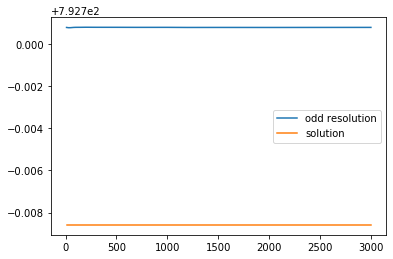

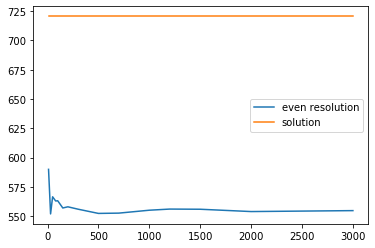

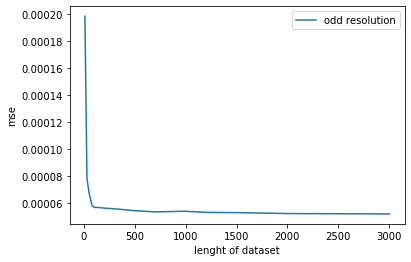

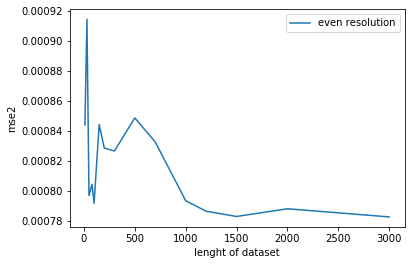

In [7]:
plt.plot(lengths, scores, label='odd resolution')
plt.plot(lengths,solutions, label='solution')
plt.legend()
plt.show()

plt.plot(lengths, scores2, label='even resolution')
plt.plot(lengths,solutions2, label='solution')
plt.legend()
plt.show()


plt.plot(lengths, mse, label='odd resolution')
plt.xlabel('lenght of dataset')
plt.ylabel('mse')
plt.legend()
plt.show()

plt.plot(lengths, mse2, label='even resolution')
plt.xlabel('lenght of dataset')
plt.ylabel('mse2')
plt.legend()
plt.show()

Comments:

- The reconstruction doesn't lose intensity when the number of voxels per dimension is odd
- And the mean squared error is lower in the case odd

## Evolution of the Mean-Squared Error with the size of the grid

In [8]:
crds = np.array([[0.,5.,5.],[5.,5.,5.],[5.,5.,0.]])
sizes_grid = [8,9,16,17,32,33,64,65,128,129,256,257]
scores_ = []
solutions = []
mse_ = []
for size_grid in sizes_grid:
    start = time.time()
    print(f"With res = {size_grid}x{size_grid}:")
    particle_ = particle(n_atom=3, rads_atom=[2.,2.,2.], crds = crds,size_grid=size_grid)
    particle_.create_map()
    volume = particle_.volume
    data, metadata = generate_dataset(particle_, n_projections=100, save=False)
    
    volume_fft = np.fft.fftshift(np.fft.fftn(np.fft.fftshift(volume)))
    vol = (backprojection(data, metadata[:,0:3]))
    vol_fft = np.fft.fftshift(np.fft.fftn(np.fft.fftshift(vol)))
    end = time.time()

    print(f"sum of pixels for backprojection: {np.sum(np.real(vol))}")
    print(f"sum of pixels for real volume: {np.sum(np.real(volume))}")
    print(f"sum of pixels for backprojection in Fourier space: {np.sum(np.abs(vol_fft))}")
    print(f"sum of pixels for real volume in Fourier space: {np.sum(np.abs(volume_fft))}")
    print(f"mse in real space: {(np.mean(np.power(volume-vol, 2)))}")
    print(f"time required: {end-start}")
    print(50*"-")
    
    scores_.append(np.sum(np.real(vol)))
    solutions.append(np.sum(np.real(volume)))
    mse_.append((np.mean(np.power(volume-vol, 2))))

With res = 8x8:
100 images were created
sum of pixels for backprojection: 5.791757102936496
sum of pixels for real volume: 8.287035136242396
sum of pixels for backprojection in Fourier space: 347.6232125836711
sum of pixels for real volume in Fourier space: 633.3305091026141
mse in real space: 0.003499505033253895
time required: 0.20885562896728516
--------------------------------------------------
With res = 9x9:
100 images were created
sum of pixels for backprojection: 12.385940910793632
sum of pixels for real volume: 12.385570953133499
sum of pixels for backprojection in Fourier space: 842.8832053877675
sum of pixels for real volume in Fourier space: 1070.1725570511396
mse in real space: 0.000399360522971474
time required: 0.23550081253051758
--------------------------------------------------
With res = 16x16:
100 images were created
sum of pixels for backprojection: 64.34087209715685
sum of pixels for real volume: 81.64477508037352
sum of pixels for backprojection in Fourier space:

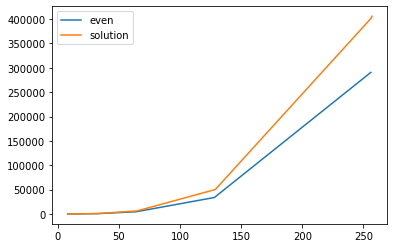

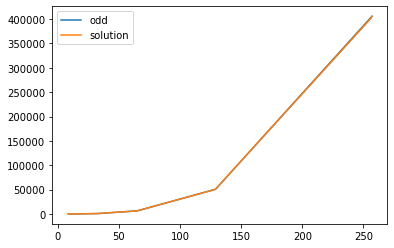

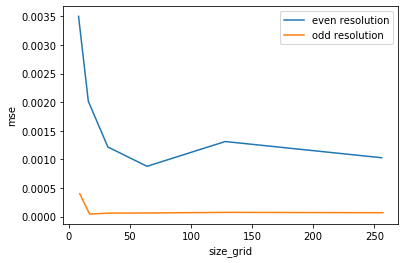

In [10]:
plt.plot([sizes_grid[2*i] for i in range(len(sizes_grid)//2)], [scores_[2*i] for i in range(len(scores_)//2)], label='even')
plt.plot(sizes_grid,solutions, label='solution')
plt.legend()
plt.show()

plt.plot([sizes_grid[2*i+1] for i in range(len(sizes_grid)//2)], [scores_[2*i+1] for i in range(len(scores_)//2)], label='odd')
plt.plot(sizes_grid,solutions, label='solution')
plt.legend()
plt.show()

plt.plot([sizes_grid[2*i] for i in range(len(sizes_grid)//2)], [mse_[2*i] for i in range(len(mse_)//2)], label='even resolution')
plt.xlabel('size_grid')
plt.ylabel('mse')
plt.plot([sizes_grid[2*i+1] for i in range(len(sizes_grid)//2)], [mse_[2*i+1] for i in range(len(mse_)//2)], label='odd resolution')
plt.legend()
plt.show()

#plt.plot(sizes_grid, [mse_[i]/sizes_grid[i]**3 for i in range(len(mse_))], label='mean squared error')
#plt.xlabel('size_grid')
#plt.ylabel('averaged mse')
#plt.legend()
#plt.show()